# <center><u>Removing Outliers from the DataFrame</u> </center>

Outliers are data points that are far from other data points. In other words, they’re extreme values that are outside the range of what is expected and unlike the other data. Outliers are problematic for many statistical analyses because they can cause tests to either miss significant findings or distort real results.

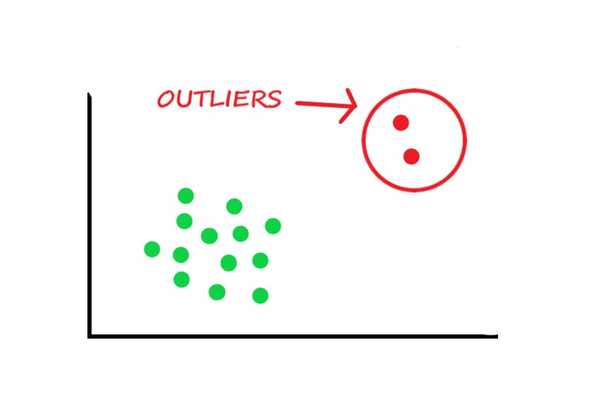

**CAUSE FOR OUTLIERS**

* Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
* Measurement Error:- It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
* Natural Outlier:- When an outlier is not artificial (due to error), it is a natural outlier. Most of real world data belong to this category.


**Impact of Outliers on a dataset**

Outliers can drastically change the results of the data analysis and statistical modeling. There are numerous unfavourable impacts of outliers in the data set:
- It increases the error variance and reduces the power of statistical tests
- If the outliers are non-randomly distributed, they can decrease normality
- They can bias or influence estimates that may be of substantive interest
- They can also impact the basic assumption of Regression, ANOVA and other statistical model assumptions.

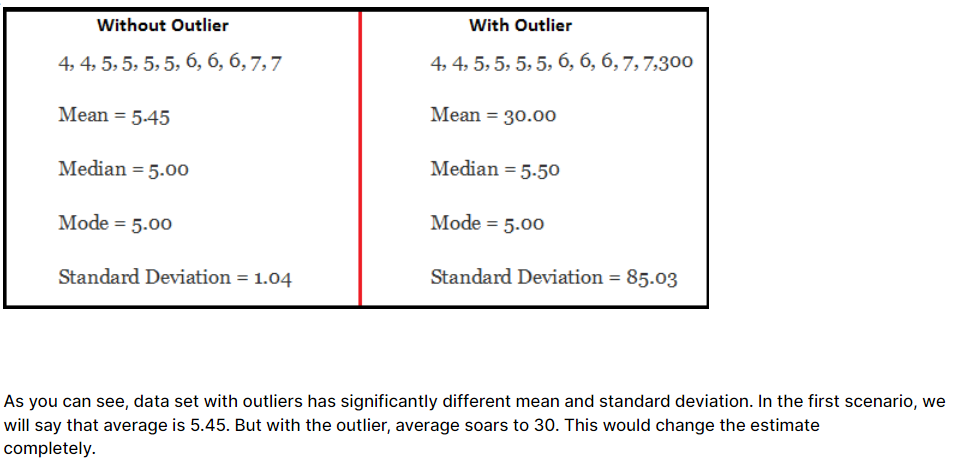

Type of outlier:

Outliers can be of two kinds: univariate and multivariate.

1. **Univariate outliers** can be found when looking at a distribution of values in a single feature space.

2. **Multivariate outliers** can be found in a n-dimensional space (of n-features). Looking at distributions in n-dimensional spaces can be very difficult for the human brain, that is why we need to train a model to do it for us.


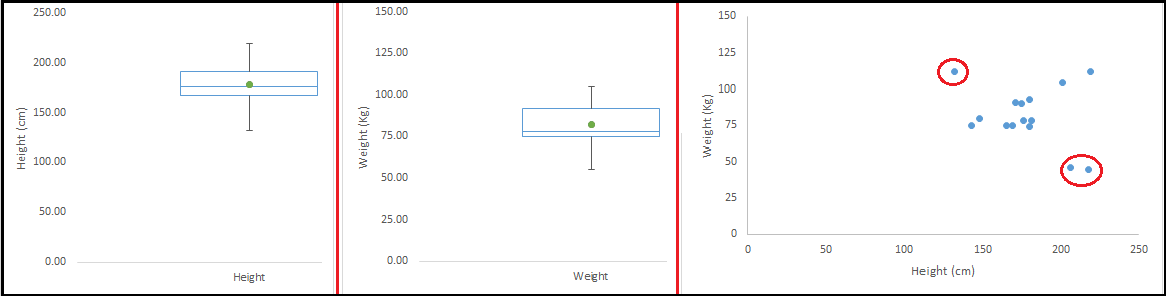

## Outlier Detection

In [ ]:
import pandas as pd

In [ ]:
Working_Woman = [('Shreya', 28, 'Himachal', 20000),
            ('Sanju', 32, 'Delhi', 30000),
            ('Alia', 29, 'Mumbai', 25000),
            ('Sanjana', 25, 'Delhi', 45000),
            ('Saumya', 25, 'Delhi', 32000),
            ('Sanjana', 30, 'Delhi', 40000),
            ('Rinki', 32, 'Kolkata', 30000),
            ('Seema', 32, 'Delhi', 1000000),
            ('Rinki', 30, 'Delhi', 25),
            ('Ramya', 28, 'Bangalore', 52000)
            ]

In [ ]:
df = pd.DataFrame(Working_Woman, columns = ['Name', 'Age', 'City', 'Salary'])

In [ ]:
df

,Name,Age,City,Salary
0,Shreya,28,Himachal,20000
1,Sanju,32,Delhi,30000
2,Alia,29,Mumbai,25000
3,Sanjana,25,Delhi,45000
4,Saumya,25,Delhi,32000
5,Sanjana,30,Delhi,40000
6,Rinki,32,Kolkata,30000
7,Seema,32,Delhi,1000000
8,Rinki,30,Delhi,25
9,Ramya,28,Bangalore,52000


In [ ]:
df.describe()

,Age,Salary
count,10.000000,10.000000
mean,29.100000,127402.500000
std,2.643651,306931.775004
min,25.000000,25.000000
25%,28.000000,26250.000000
50%,29.500000,31000.000000
75%,31.500000,43750.000000
max,32.000000,1000000.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-8-598c5764c951>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df.Salary,hist=False)


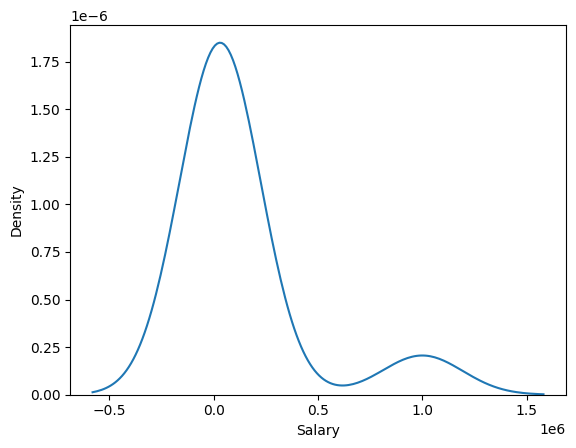

In [ ]:
sns.distplot(a=df.Salary,hist=False)
plt.show()

<ipython-input-11-52b0d4f68998>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df.Salary, hist=False)


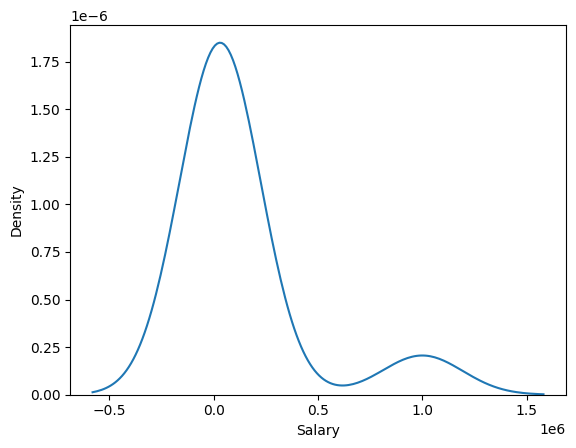

In [ ]:
sns.distplot(a=df.Salary, hist=False)
plt.show()

In [ ]:
df.describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.85,.9,.95,.99])

,Age,Salary
count,10.000000,10.000000
mean,29.100000,127402.500000
std,2.643651,306931.775004
min,25.000000,25.000000
1%,25.000000,1822.750000
10%,25.000000,18002.500000
20%,27.400000,24000.000000
30%,28.000000,28500.000000
40%,28.600000,30000.000000
50%,29.500000,31000.000000


## Outlier Handling

### 1. Trimming Outliers

In [ ]:
df[(df.Salary < 1000) | (df.Salary > 100000)]

,Name,Age,City,Salary
7,Seema,32,Delhi,1000000
8,Rinki,30,Delhi,25


In [ ]:
df1=df.copy()

In [ ]:
df1=df1[~((df.Salary < 1000) | (df.Salary > 100000))]

In [ ]:
df1

,Name,Age,City,Salary
0,Shreya,28,Himachal,20000
1,Sanju,32,Delhi,30000
2,Alia,29,Mumbai,25000
3,Sanjana,25,Delhi,45000
4,Saumya,25,Delhi,32000
5,Sanjana,30,Delhi,40000
6,Rinki,32,Kolkata,30000
9,Ramya,28,Bangalore,52000


### 2. Capping Outliers

In [ ]:
df2=df.copy()

In [ ]:
df2

,Name,Age,City,Salary
0,Shreya,28,Himachal,20000
1,Sanju,32,Delhi,30000
2,Alia,29,Mumbai,25000
3,Sanjana,25,Delhi,45000
4,Saumya,25,Delhi,32000
5,Sanjana,30,Delhi,40000
6,Rinki,32,Kolkata,30000
7,Seema,32,Delhi,1000000
8,Rinki,30,Delhi,25
9,Ramya,28,Bangalore,52000


In [ ]:
lower_percentile = 0.10
higher_percentile = 0.90

In [ ]:
low,high=df2.Salary.quantile([lower_percentile, higher_percentile])

In [ ]:
low, high = df2.Salary.quantile([lower_percentile, higher_percentile])

In [ ]:
low

18002.5

In [ ]:
high

146799.99999999965

In [ ]:
import numpy as np

In [ ]:
df2['Salary']=np.where(df2['Salary'] >= high,high,np.where(df2['Salary'] <= low,low,df2['Salary']))

In [ ]:
df2['Salary'] = np.where(df2['Salary'] >= high,high,np.where(df2['Salary'] <= low,low,df2['Salary']))

In [ ]:
df2

,Name,Age,City,Salary
0,Shreya,28,Himachal,20000.0
1,Sanju,32,Delhi,30000.0
2,Alia,29,Mumbai,25000.0
3,Sanjana,25,Delhi,45000.0
4,Saumya,25,Delhi,32000.0
5,Sanjana,30,Delhi,40000.0
6,Rinki,32,Kolkata,30000.0
7,Seema,32,Delhi,146800.0
8,Rinki,30,Delhi,18002.5
9,Ramya,28,Bangalore,52000.0


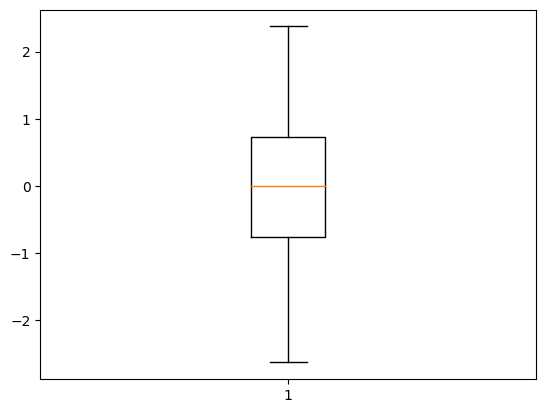

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some data
data = np.random.normal(0, 1, 100)

# Calculate the quartiles (Q1, Q2, Q3)
q1, q2, q3 = np.percentile(data, [25, 50, 75])

# Calculate the interquartile range (IQR)
iqr = q3 - q1

# Define the upper and lower bounds for outliers
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

# Find the outliers
outliers = [x for x in data if x < lower_bound or x > upper_bound]

# Plot the box plot
plt.boxplot(data)

# Add the outliers to the plot
plt.scatter(np.ones(len(outliers)), outliers, color='red', marker='o')

# Show the plot
plt.show()